# Case Study: Single-Employer Plan De-Risking Activities Prediction

Import Python packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score, precision_score, recall_score, auc, roc_curve, roc_auc_score

In [2]:
# Load data
derisking_data = pd.read_csv('C:/dsge/form/data/derisking_clean_data.csv') #change the directory to the location of your data file
derisking_data.head()

,current_TOT_PARTCP_BOY_CNT,current_SB_PR_YR_FNDNG_PRCNT,current_TOT_ASSETS_BOY_AMT,current_BNFTS_PAYABLE_BOY_AMT,current_OPRTNG_PAYABLE_BOY_AMT,current_ACQUIS_INDBT_BOY_AMT,current_OTHER_LIAB_BOY_AMT,current_TOT_LIABILITIES_BOY_AMT,current_NET_ASSETS_BOY_AMT,TOT_ASSETS_EOY_AMT,...,current_corp debt,current_public_equity,current_real_estate,current_loans,current_employer inv,current_building,current_partnership,current_others,fr,risk_transfer
0,3588.0,0.0,75068849.0,0.000000e+00,0.00000,1.0,0.0,1203000.0,73865849.0,50750104.0,...,0.0,0.000000,0.0,0.0,0.999911,0.0,0.000000,0.000000,62.401371,0
1,3971.0,0.0,50750104.0,0.000000e+00,0.00000,1.0,0.0,1039800.0,49710304.0,68996396.0,...,0.0,0.000000,0.0,0.0,0.999896,0.0,0.000000,0.000000,48.807563,0
2,55888.0,0.0,173477656.0,1.759378e-07,0.13479,0.0,463067.0,4306545.0,169171111.0,0.0,...,0.0,0.102711,0.0,0.0,0.000000,0.0,0.241188,0.610659,40.282327,1
3,2400.0,0.0,11055.0,0.000000e+00,0.00000,0.0,10720.0,10720.0,335.0,11055.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,1.031250,0
4,1561.0,0.0,5599033.0,7.091626e-07,0.01326,0.0,0.0,1391416.0,4207617.0,4123185.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,4.023982,0


In [3]:
x_cols = list(derisking_data.columns)
x_cols.remove('risk_transfer')
y_col = 'risk_transfer'
# sum(derisking_data[y_col])

## Model Training and Validation 

In [4]:
#Split data into training and validation datasets
train, test = train_test_split(derisking_data, test_size=0.2, random_state=123)

### Logistic Regression 

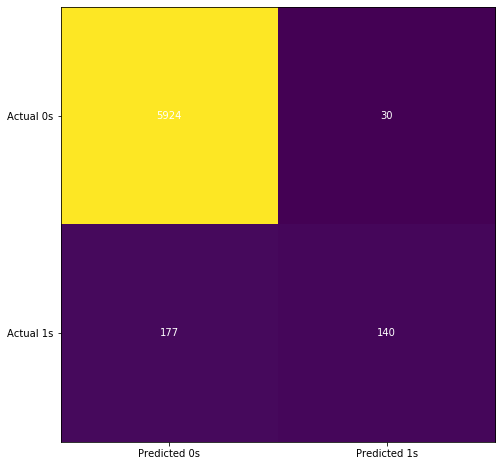

precision:  0.8235294117647058
recall:  0.4416403785488959
f-measure:  0.5749486652977412
auc:  0.84884085030449


Text(0, 0.5, 'FPR')

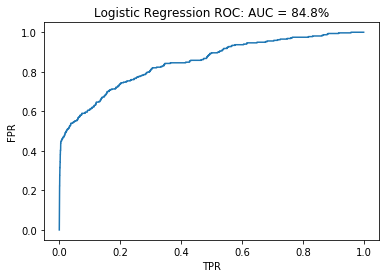

In [5]:
#model fitting
logistic_model = LogisticRegression(penalty='l2', tol=1e-7, C=1.0, fit_intercept=True, solver='lbfgs', max_iter=10000, random_state=123).fit(train[x_cols], train[y_col])

y_validation = logistic_model.predict(test[x_cols])
y_validation_score= logistic_model.predict_proba(test[x_cols])[:,1]

#model validation
fpr, tpr, thresholds = roc_curve(test[y_col], y_validation_score, pos_label=1)
precision = precision_score(test[y_col], y_validation, average='binary')
recall = recall_score(test[y_col], y_validation, average='binary')
f_measure = 2 * precision * recall / (precision + recall)
auc = roc_auc_score(test[y_col], y_validation_score)

#confusion matrix
cm = confusion_matrix(test[y_col], logistic_model.predict(test[x_cols]))
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()

print("precision: ", precision)
print("recall: ", recall)
print("f-measure: ", f_measure)
print("auc: ", auc)

#ROC
plt.plot(fpr, tpr)
plt.title("Logistic Regression ROC: AUC = 84.8%")
plt.xlabel("TPR")
plt.ylabel("FPR")

### Random Forest

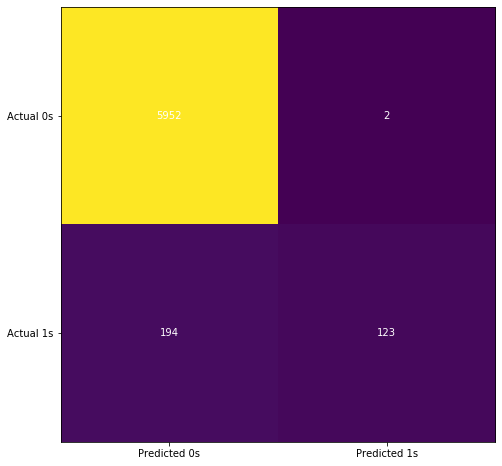

precision:  0.984
recall:  0.38801261829652994
f-measure:  0.5565610859728507
auc:  0.8559598350762789


Text(0, 0.5, 'FPR')

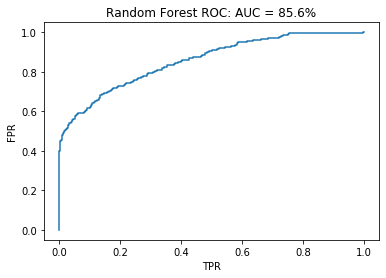

In [10]:
#model fitting
model = RandomForestClassifier(n_estimators=500, max_depth=25, random_state = 123, criterion = 'gini', n_jobs = 5).fit(train[x_cols], train[y_col])

y_validation = model.predict(test[x_cols])
y_validation_score= model.predict_proba(test[x_cols])[:,1]

#model validation
fpr, tpr, thresholds = roc_curve(test[y_col], y_validation_score, pos_label=1)
precision = precision_score(test[y_col], y_validation, average='binary')
recall = recall_score(test[y_col], y_validation, average='binary')
f_measure = 2 * precision * recall / (precision + recall)
auc = roc_auc_score(test[y_col], y_validation_score)

#confusion matrix
cm = confusion_matrix(test[y_col], model.predict(test[x_cols]))
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()

print("precision: ", precision)
print("recall: ", recall)
print("f-measure: ", f_measure)
print("auc: ", auc)

#ROC
plt.plot(fpr, tpr)
plt.title("Random Forest ROC: AUC = 85.6%")
plt.xlabel("TPR")
plt.ylabel("FPR")

### CART

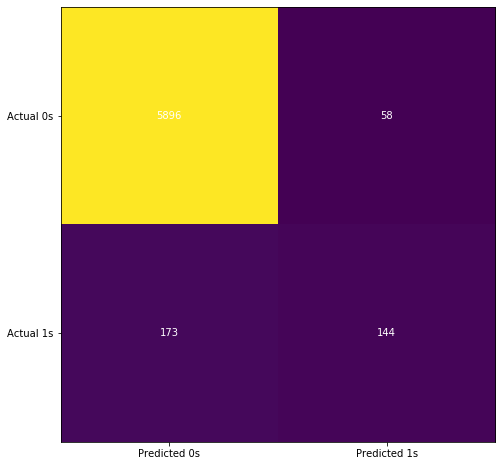

precision:  0.7128712871287128
recall:  0.45425867507886436
f-measure:  0.5549132947976878
auc:  0.7774578816139297


Text(0, 0.5, 'FPR')

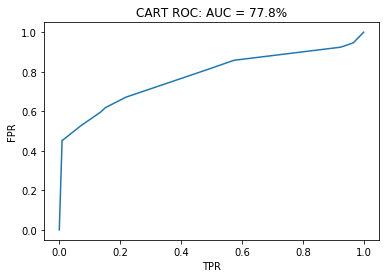

In [11]:
#model fitting
model = DecisionTreeClassifier(max_depth=20, random_state = 123, criterion = 'gini').fit(train[x_cols], train[y_col])

y_validation = model.predict(test[x_cols])
y_validation_score= model.predict_proba(test[x_cols])[:,1]

#model validation
fpr, tpr, thresholds = roc_curve(test[y_col], y_validation_score, pos_label=1)
precision = precision_score(test[y_col], y_validation, average='binary')
recall = recall_score(test[y_col], y_validation, average='binary')
f_measure = 2 * precision * recall / (precision + recall)
auc = roc_auc_score(test[y_col], y_validation_score)

#confusion matrix
cm = confusion_matrix(test[y_col], model.predict(test[x_cols]))
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()

print("precision: ", precision)
print("recall: ", recall)
print("f-measure: ", f_measure)
print("auc: ", auc)

#ROC
plt.plot(fpr, tpr)
plt.title("CART ROC: AUC = 77.8%")
plt.xlabel("TPR")
plt.ylabel("FPR")

Text(0, 0.5, 'FPR')

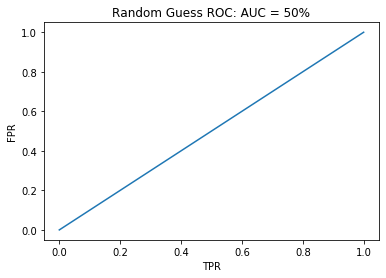

In [12]:
#Draw the ROC of random guessing
fpr = np.linspace(0,1.0,101)
tpr = np.linspace(0,1.0,101)
plt.plot(fpr, tpr)
plt.title("Random Guess ROC: AUC = 50%")
plt.xlabel("TPR")
plt.ylabel("FPR")

### GBM 

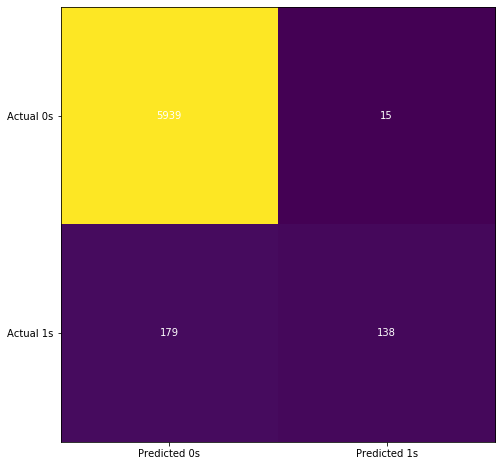

precision:  0.9019607843137255
recall:  0.4353312302839117
f-measure:  0.5872340425531914
auc:  0.8778158839218446


Text(0, 0.5, 'FPR')

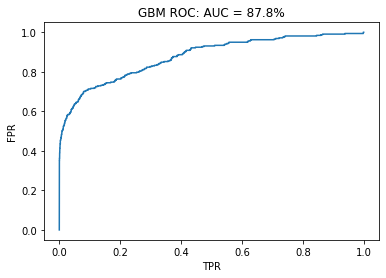

In [14]:
#model fitting
model = GradientBoostingClassifier(loss='deviance', n_estimators=500, max_depth=20, tol=1e-6, random_state = 123, learning_rate=0.01, criterion = 'friedman_mse').fit(train[x_cols], train[y_col])

y_validation = model.predict(test[x_cols])
y_validation_score= model.predict_proba(test[x_cols])[:,1]

#model validation
fpr, tpr, thresholds = roc_curve(test[y_col], y_validation_score, pos_label=1)
precision = precision_score(test[y_col], y_validation, average='binary')
recall = recall_score(test[y_col], y_validation, average='binary')
f_measure = 2 * precision * recall / (precision + recall)
auc = roc_auc_score(test[y_col], y_validation_score)

#confusion matrix
cm = confusion_matrix(test[y_col], model.predict(test[x_cols]))
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()

print("precision: ", precision)
print("recall: ", recall)
print("f-measure: ", f_measure)
print("auc: ", auc)

#ROC
plt.plot(fpr, tpr)
plt.title("GBM ROC: AUC = 87.8%")
plt.xlabel("TPR")
plt.ylabel("FPR")

### ANN 

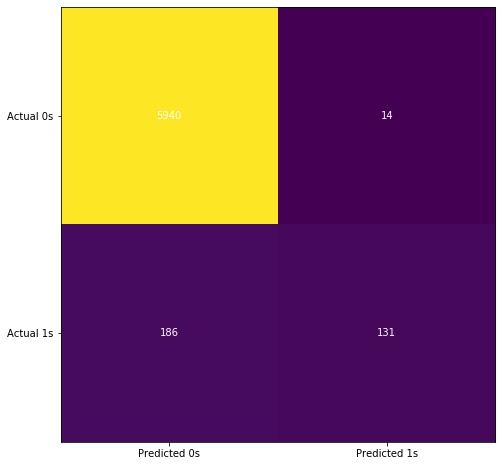

precision:  0.903448275862069
recall:  0.41324921135646686
f-measure:  0.5670995670995671
auc:  0.836495678222842


Text(0, 0.5, 'FPR')

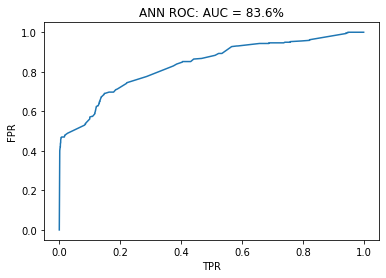

In [13]:
#model fitting
model = MLPClassifier(hidden_layer_sizes=(100,25), activation='tanh',
                                 solver='adam', alpha=0.0001, batch_size=1000,
                                 learning_rate='adaptive', learning_rate_init=0.1,
                                 max_iter=1000000, shuffle=True, random_state=123,
                                 tol=1e-7, verbose=False, warm_start=False, momentum=0.9,
                                 nesterovs_momentum=True, early_stopping=False,
                                 validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08,
                                 n_iter_no_change=10, max_fun=15000).fit(train[x_cols], train[y_col])

y_validation = model.predict(test[x_cols])
y_validation_score= model.predict_proba(test[x_cols])[:,1]

#model validation
fpr, tpr, thresholds = roc_curve(test[y_col], y_validation_score, pos_label=1)
precision = precision_score(test[y_col], y_validation, average='binary')
recall = recall_score(test[y_col], y_validation, average='binary')
f_measure = 2 * precision * recall / (precision + recall)
auc = roc_auc_score(test[y_col], y_validation_score)

#confusion matrix
cm = confusion_matrix(test[y_col], model.predict(test[x_cols]))
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()

print("precision: ", precision)
print("recall: ", recall)
print("f-measure: ", f_measure)
print("auc: ", auc)

#ROC
plt.plot(fpr, tpr)
plt.title("ANN ROC: AUC = 83.6%")
plt.xlabel("TPR")
plt.ylabel("FPR")
